In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-and-job-market/ai_job_market_insights.csv


1.Problem Statement: How Ai manipulated the job makrket ?



****Objectives:****
          
          
1. To find in which industry will get automated with Ai?
2. which Skill can get you job best job?
3. which industries adopt the Ai most?
4. Find the which industry and job title will grow in next five years* 

          

In [2]:
# first we have to import the libraries we needed:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

plt.style.use('seaborn-v0_8-darkgrid')



In [3]:
df=pd.read_csv('/kaggle/input/ai-and-job-market/ai_job_market_insights.csv')
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


# ****1.Dataset Description****

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [5]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [6]:

df['Job_Title'].unique()

array(['Cybersecurity Analyst', 'Marketing Specialist', 'AI Researcher',
       'Sales Manager', 'UX Designer', 'HR Manager', 'Product Manager',
       'Software Engineer', 'Data Scientist', 'Operations Manager'],
      dtype=object)

In [7]:
df['Industry'].unique()

array(['Entertainment', 'Technology', 'Retail', 'Education', 'Finance',
       'Transportation', 'Telecommunications', 'Manufacturing',
       'Healthcare', 'Energy'], dtype=object)

# ****2.Cleaning Dataset****

In [8]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

**There is No Null value in this Dataset**

 # 3.Univariate Analysis 

In [9]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


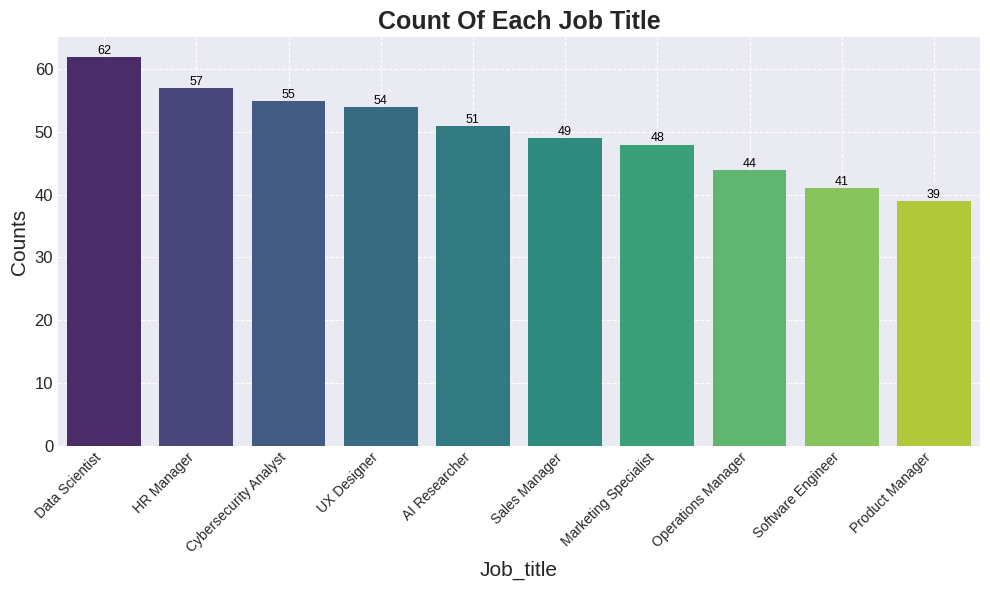

In [10]:
# analysis on the basis of the job title value counts

# preparing the data :
value_counts=df.Job_Title.value_counts().reset_index()
value_counts.columns=['Job_Title','Counts']
value_counts=value_counts.sort_values(by='Counts',ascending=False)

# plotting:
plt.figure(figsize=(10,6))
barplot=sns.barplot(

    data=value_counts,
    x='Job_Title',
    y='Counts',
    palette='viridis',
    
)
for index, row in value_counts.iterrows():
    barplot.text(index, row['Counts'] + 0.5, row['Counts'], color='black', ha="center", fontsize=9)
    
plt.title('Count Of Each Job Title',fontsize=18,weight='bold')
plt.xlabel('Job_title',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(rotation=45,fontsize=10,ha='right')
plt.yticks(fontsize=12)
plt.grid( axis='both',linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


Insight:From this plot we can see that there is hieghest job available for the Data Scientist title

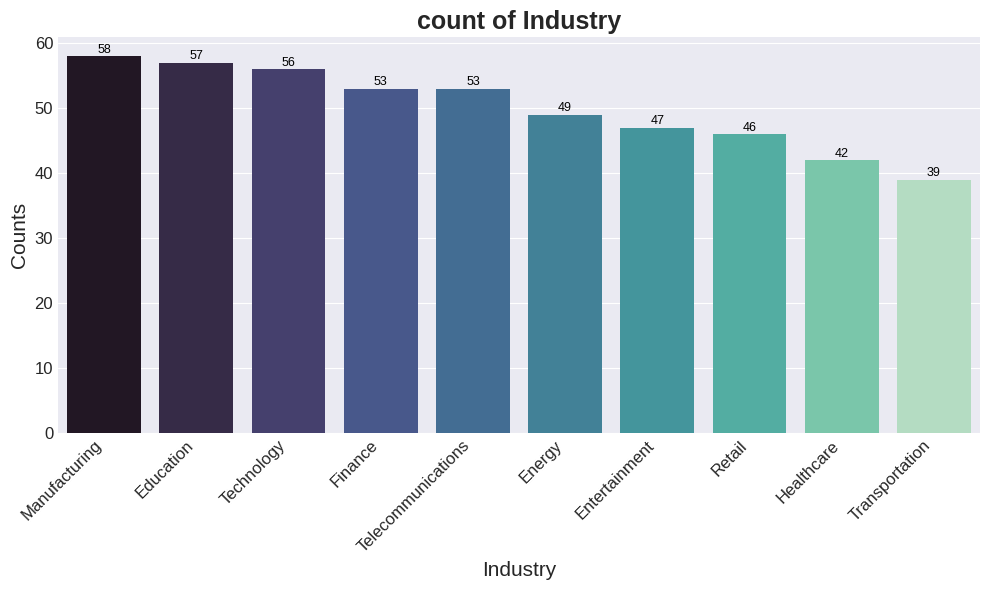

In [11]:
# analysis on the industry counts :
# preparing the data:

value_counts=df['Industry'].value_counts().reset_index()
value_counts.columns=['Industry','Counts']
value_counts=value_counts.sort_values(by='Counts',ascending=False)
plt.figure(figsize=(10,6))
barplot=sns.barplot(data=value_counts,
            x='Industry',
            y='Counts',
            palette='mako',
           )
for i,row in value_counts.iterrows():
    barplot.text(i,row['Counts'] + 0.5, row['Counts'], color='black', ha="center", fontsize=9)
    
plt.title('count of Industry',fontsize=18,weight='bold')
plt.xlabel('Industry',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(rotation=45,fontsize=12,ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Insight: From this plot on the Industry count we can see that the jobs are higest in manufacturing,Eduacation and Technology sector and least in the Transportation and Healthcare sectors

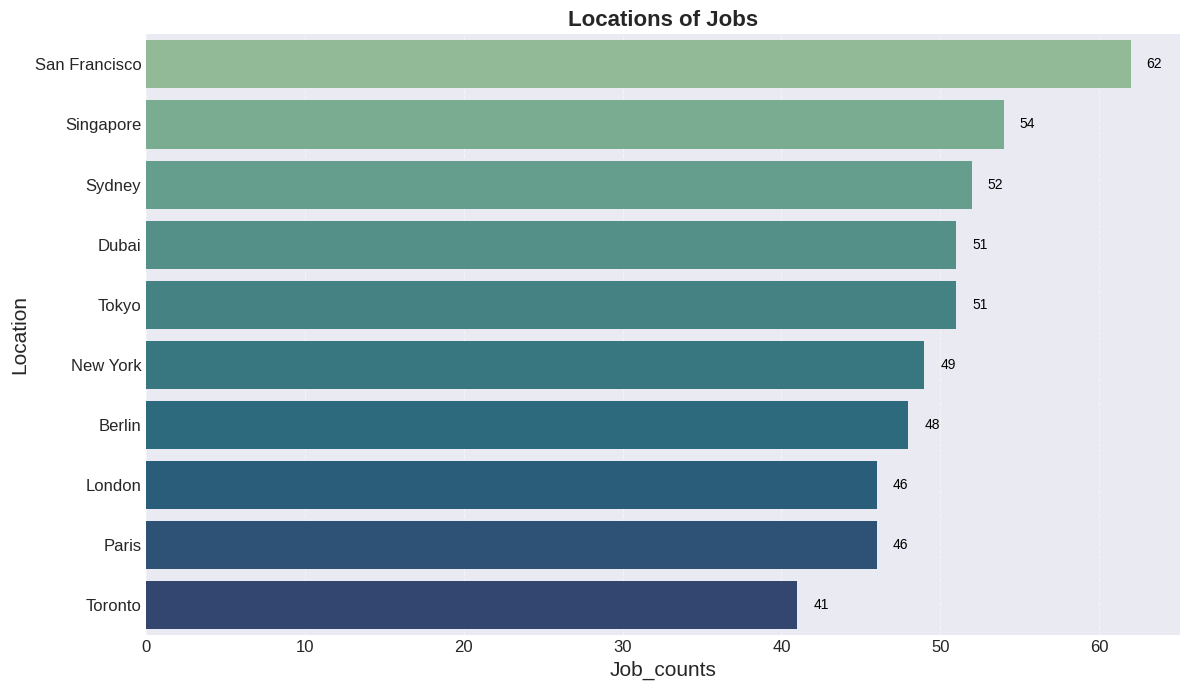

In [12]:
# analysis on which loacation has highest jobs :
# preparing the data:
location_counts=df['Location'].value_counts().reset_index()
    
location_counts.columns=['Location','Job_Counts']
location_counts=location_counts.sort_values(by='Job_Counts',ascending=False)
# plotting the data
plt.figure(figsize=(12,7))
barplot=sns.barplot(data=location_counts,
            y='Location',
            x='Job_Counts',
            palette='crest'
            )

#To show the value counts of each bar  
for i, row in location_counts.iterrows():
    barplot.text(row['Job_Counts'] +1, i, row['Job_Counts'], color='black', va='center', fontsize=10)
    
plt.title('Locations of Jobs',fontsize=16,weight='bold')
plt.xlabel('Job_counts',fontsize=15)
plt.ylabel('Location',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


Insight: Tech hub like San francisco and strong Economies like singapore,Dubai has highest jobs available

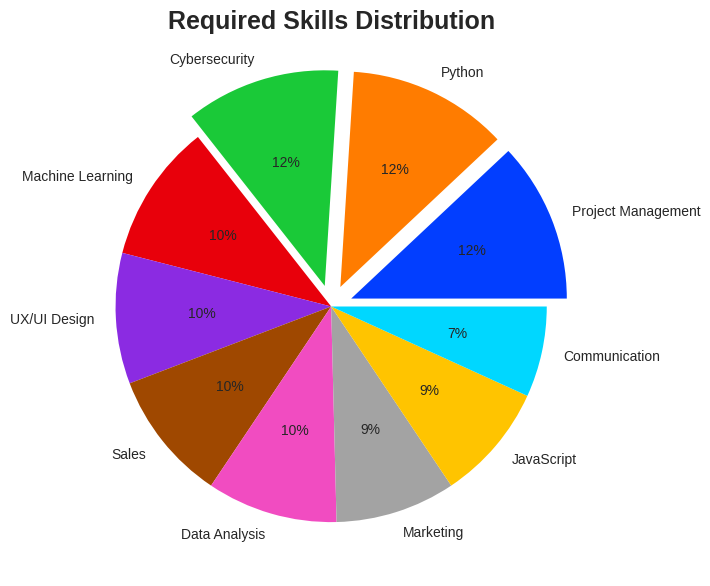

In [13]:
# Now we plot which skills are most job driven
# preparing the data:

skills_count=df["Required_Skills"].value_counts().reset_index()
skills_count.columns=['Skills','Count']
# skills_count=skills_count.sort_values(by='Count',ascending=False)

# plotting the skill counts:

plt.figure(figsize=(12,7))
color=sns.color_palette('bright')
top_three=skills_count['Count'].nlargest(3).index
explode=[0.1 if i in top_three else 0 for i in range (len(skills_count))]
plt.pie(
    skills_count['Count'],
    labels=skills_count['Skills'],
    colors=color[:len(skills_count)],
    autopct='%.0f%%',
    explode=explode
)
plt.title('Required Skills Distribution',fontsize=18,weight='bold')
plt.show()



Insight: From this plot we can see that Due to Ai skills like python,cybersecurity,and project management are Trending 

# ****4. Bivariate Analysis****

In [14]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


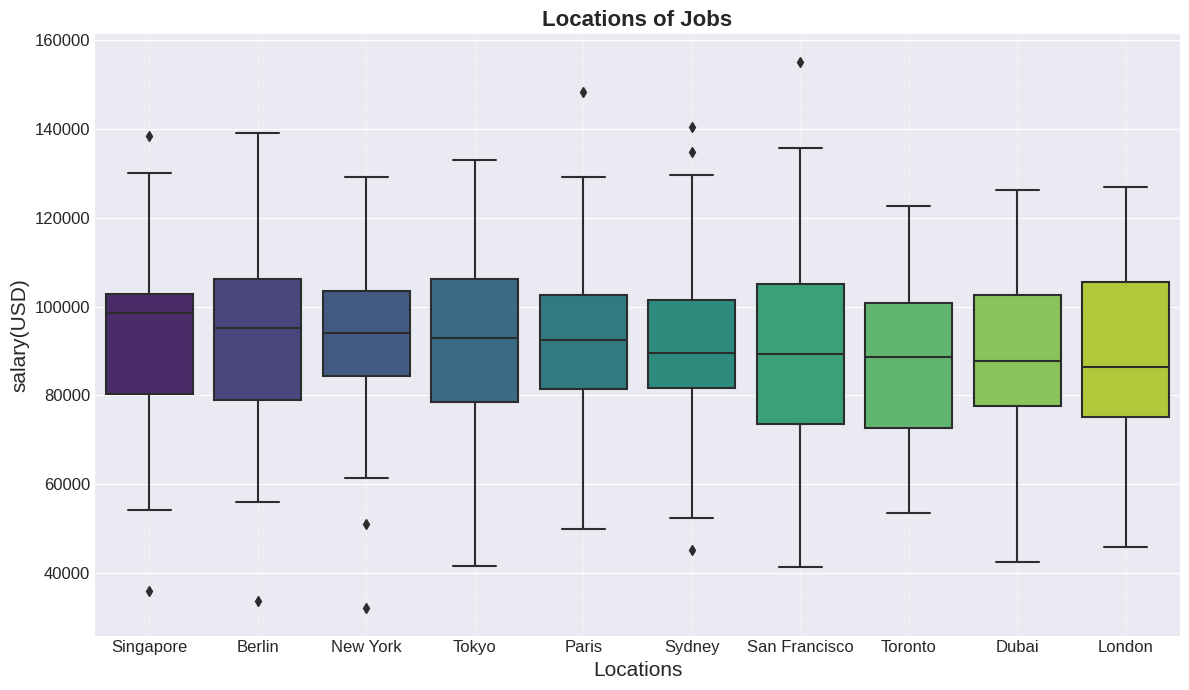

In [15]:

plt.figure(figsize=(12,7))
order=df.groupby('Location')['Salary_USD'].median().sort_values(ascending=False).index
sns.boxplot(data=df,x='Location',y='Salary_USD',palette='viridis',order=order)
plt.title('Locations of Jobs',fontsize=16,weight='bold')
plt.xlabel('Locations',fontsize=15)
plt.ylabel('salary(USD)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


Insight:Among all locations, Singapore shows one of the highest median salaries in the dataset